In [16]:
using RDatasets, LinearAlgebra

Let's compare how Poisson EPCA performs against vanilla PCA on compositional data. For this example, we use the [Chemical Composition of Pottery](https://vincentarelbundock.github.io/Rdatasets/doc/carData/Pottery.html) dataset from RDatasets. More information about the dataset can be found on the doc. 

In [42]:
df = dataset("car", "Pottery")
labels = Vector(df[:, 1])
compositions = Matrix(soils[:, 2:end])
normalized_compositions = (compositions ./ sum(compositions, dims=2))

26×5 Matrix{Float64}:
 0.546282  0.265554   0.163126   0.00569044   0.0193475
 0.560976  0.287805   0.139431   0.00487805   0.00691057
 0.563707  0.273745   0.149807   0.00501931   0.00772201
 0.48299   0.267535   0.236875   0.00671987   0.00587988
 0.518797  0.265414   0.200752   0.0075188    0.0075188
 0.518554  0.297812   0.165081   0.00808754   0.0104662
 0.531579  0.224211   0.224211   0.0105263    0.00947368
 0.490901  0.244604   0.250106   0.00761744   0.00677105
 0.511521  0.252995   0.208295   0.0133641    0.0138249
 0.478059  0.246878   0.257938   0.0099893    0.00713521
 ⋮                                            
 0.837308  0.126656   0.0333863  0.000529942  0.00211977
 0.889328  0.0741107  0.0331028  0.000494071  0.00296443
 0.873362  0.0912179  0.0329937  0.000485201  0.00194081
 0.896552  0.0650862  0.0310345  0.00301724   0.00431034
 0.907692  0.0574359  0.0287179  0.00307692   0.00307692
 0.905045  0.0563798  0.0331355  0.00296736   0.0024728
 0.917079  0.0505217  0.

In [43]:
using Revise
using ExpFamilyPCA

In [44]:
indim = size(normalized_compositions)[2]
epca = PoissonEPCA(indim, 3)
A1 = fit!(epca, normalized_compositions; verbose=true, maxiter=20)
Xre1 = decompress(epca, A1)

Iteration: 1/20 | Loss: 1.1906795777415384
Iteration: 10/20 | Loss: 0.0402189410067442
Iteration: 20/20 | Loss: 0.034536886863911605


26×5 Matrix{Float64}:
 0.556976  0.267691   0.171382   0.00844586  0.00928941
 0.5643    0.285017   0.140637   0.00595775  0.00715463
 0.556028  0.276763   0.146026   0.00615782  0.00722424
 0.486302  0.270059   0.230344   0.00963931  0.00959326
 0.514841  0.268243   0.198478   0.00871272  0.00910731
 0.541308  0.300338   0.172134   0.00754753  0.0086219
 0.50868   0.219271   0.215575   0.0103699   0.00982097
 0.48038   0.244849   0.242217   0.0104813   0.00990697
 0.510686  0.250528   0.212267   0.00982573  0.0098037
 0.475889  0.247087   0.256547   0.0113141   0.0105228
 ⋮                                           
 0.839833  0.12534    0.0339065  0.00177103  0.00258914
 0.878189  0.0747451  0.0303142  0.00190268  0.00241077
 0.862827  0.0941695  0.0294158  0.0015961   0.00221385
 0.902971  0.0649694  0.0330551  0.00253879  0.00297904
 0.909828  0.0555374  0.02946    0.00218594  0.00252212
 0.904918  0.0567702  0.032003   0.00249673  0.00282414
 0.93351   0.0518958  0.0296744  0.0024

In [45]:
using MultivariateStats

In [77]:
M = fit(PCA, normalized_compositions'; maxoutdim=3)
A2 = predict(M, normalized_compositions')'
Xre2 = reconstruct(M, A2')'

26×5 adjoint(::Matrix{Float64}) with eltype Float64:
 0.548914  0.26842    0.16606    0.00784425  0.00876223
 0.559873  0.286644   0.138154   0.00684533  0.00848357
 0.562796  0.272794   0.148743   0.00719938  0.00846742
 0.480504  0.264907   0.234007   0.0104238   0.010159
 0.517715  0.264269   0.199504   0.0091052   0.00940717
 0.518973  0.298261   0.165557   0.00793266  0.009276
 0.53184   0.224484   0.224516   0.00991597  0.0092447
 0.488865  0.242455   0.247753   0.0108673   0.0100594
 0.514062  0.255681   0.211227   0.0095215   0.00950786
 0.476694  0.245425   0.256377   0.011207    0.0102967
 ⋮                                           
 0.836386  0.125686   0.0323177  0.00222731  0.00338237
 0.888994  0.0737728  0.0327001  0.00205473  0.00247803
 0.872608  0.0904268  0.0321149  0.00209245  0.00275822
 0.897485  0.0660772  0.032104   0.00200424  0.00232996
 0.90836   0.0581385  0.0294914  0.00187595  0.00213433
 0.905423  0.0567743  0.033578   0.00202694  0.00219807
 0.916919  0

We can immediately see that Poisson EPCA does better at compressing composition data. The PCA reconstruction contains negative values. Surprisingly, the reconstructed rows sums to around one in both.

In [70]:
sum(Xre1, dims=2)'

1×26 adjoint(::Matrix{Float64}) with eltype Float64:
 1.01378  1.00307  0.992199  1.00594  0.999382  …  1.02028  0.995643  0.99458

In [71]:
sum(Xre2, dims=2)'

1×26 adjoint(::Matrix{Float64}) with eltype Float64:
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  …  1.0  1.0  1.0  1.0  1.0  1.0  1.0

In [72]:
using Statistics

In [74]:
means1 = []
means2 = []
for outdim in 1:indim
    # fit EPCA
    epca = PoissonEPCA(indim, outdim)
    A1 = fit!(epca, normalized_compositions; verbose=false, maxiter=50)
    Xre1 = decompress(epca, A1)

    # fit PCA
    M = fit(PCA, normalized_compositions; maxoutdim=outdim)
    A2 = predict(M, normalized_compositions)
    Xre2 = reconstruct(M, A2)
    
    kl(p, q) = sum(p .* log.(p ./ q))

    kl1 = []
    kl2 = []
    kl3 = []
    for (p1, p2, q) in zip(eachrow(Xre1), eachrow(Xre2), eachrow(normalized_compositions))
        if any(p2 .< 0)
            continue
        end
        push!(kl1, kl(p1, q))
        push!(kl2, kl(p2, q))
    end
    @show mean(kl1)
    @show mean(kl2)
    push!(means1, mean(kl1))
    push!(means2, mean(kl2))
end

mean(kl1) = 0.2504539558819257
mean(kl2) = 0.19873482081861316
mean(kl1) = 0.0047451145093415715
mean(kl2) = 0.004455817802528197
mean(kl1) = 0.00188422084921143
mean(kl2) = 0.004455817802528197
mean(kl1) = 0.001550444757337229
mean(kl2) = 0.004455817802528197
mean(kl1) = 0.000773740322055869
mean(kl2) = 0.004455817802528197


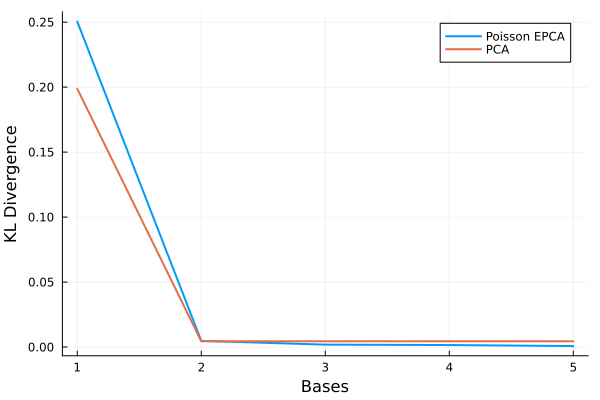

In [75]:
using Plots

# Plotting
plot(1:5, means1, label="Poisson EPCA", xlabel="Bases", ylabel="KL Divergence", linewidth=2)
plot!(1:5, means2, label="PCA", linewidth=2)